In [1]:
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

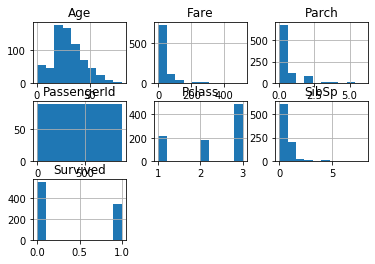

In [2]:
train=pd.read_csv('train.csv')
train.hist()
plt.show

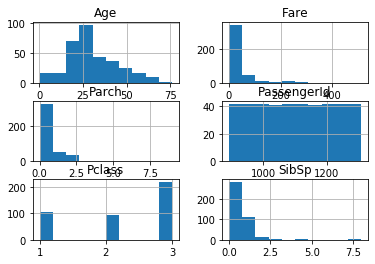

In [3]:
test=pd.read_csv('test.csv')
test.hist()
plt.show()

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [5]:
train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Clean the data
#count the number of missing values (Nan) in each column
counter_nan = train.isnull().sum()
counter_without_nan = counter_nan[counter_nan==0]

In [7]:
train['Age'] = train['Age'].fillna(train['Age']).mean()
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train['Cabin'].fillna(train['Cabin'].mode()[0], inplace=True)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [9]:
train.dropna(subset= ['Embarked'], inplace=True)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
test['Age'] = test['Age'].fillna(test['Age']).mean()
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
test['Cabin'].fillna(test['Cabin'].mode()[0], inplace=True)
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [12]:
test.dropna(subset=['Fare'], inplace=True)
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
#dropping unneccessary columns
train.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [14]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,29.699118,1,0,7.2500,S
1,1,1,female,29.699118,1,0,71.2833,C
2,1,3,female,29.699118,0,0,7.9250,S
3,1,1,female,29.699118,1,0,53.1000,S
4,0,3,male,29.699118,0,0,8.0500,S


In [15]:
#converting pclass, sex, embarked to colunms

dummies = []
dummy = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
    dummies.append(pd.get_dummies(train[col]))
    dummy.append(pd.get_dummies(test[col]))

In [16]:
titanic_dummies = pd.concat(dummies, axis=1)
titanic_dummy = pd.concat(dummy, axis=1)

In [17]:
train = pd.concat((train, titanic_dummies), axis=1)
test = pd.concat((test, titanic_dummy), axis=1)

In [18]:
train.drop(['Pclass', 'Sex', 'Embarked'],axis=1, inplace=True)
test.drop(['Pclass', 'Sex', 'Embarked'],axis=1, inplace=True)

In [19]:
train.head()

,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,0,29.699118,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,29.699118,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,29.699118,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,29.699118,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,29.699118,0,0,8.0500,0,0,1,0,1,0,0,1


In [20]:
#introducing the machine learning

X=train.drop(['Survived'], axis=1)
y=train['Survived']

print(len(X), len(y))

889 889


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf= tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
accuracy=clf.score(X_test, y_test)

In [22]:
print(accuracy)

0.7790262172284644


In [23]:
#checking which column of data contributes to the decision
clf.feature_importances_

array([0.        , 0.00152387, 0.05013065, 0.18353269, 0.00989702,
       0.        , 0.13803268, 0.54914424, 0.        , 0.01468954,
       0.        , 0.05304932])

In [24]:
#from the above, it shows that the larger number of survivors are women and children

#using random forest

from sklearn import ensemble
rlf = ensemble.RandomForestClassifier(n_estimators=100) 
rlf.fit(X_train, y_train)
Accuracy = rlf.score(X_test, y_test)
print(Accuracy)

0.7752808988764045


In [25]:
#using gradient boost
gba=ensemble.GradientBoostingClassifier(n_estimators=100)
gba.fit(X_train, y_train)
accuRacy = gba.score(X_test, y_test)
print(accuRacy)

0.8052434456928839


In [26]:
#predicting new values
test.head()

,PassengerId,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,892,30.27259,0,0,7.8292,0,0,1,0,1,0,1,0
1,893,30.27259,1,0,7.0000,0,0,1,1,0,0,0,1
2,894,30.27259,0,0,9.6875,0,1,0,0,1,0,1,0
3,895,30.27259,0,0,8.6625,0,0,1,0,1,0,0,1
4,896,30.27259,1,1,12.2875,0,0,1,1,0,0,0,1


In [27]:
test_new=test.drop('PassengerId', axis=1)
test_pred= gba.predict(test_new)
test_cat=test.PassengerId
test_cat=pd.DataFrame(test_cat)

test_cat['Survived']=test_pred
test_cat.to_csv('Titanic_submission.csv', index=False)


In [28]:
test_cat.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [29]:
test_cat

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
